In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pre = pd.read_csv('goerli_fees_pre_fork.csv')
post = pd.read_csv('goerli_fees_post_fork.csv')


In [3]:
pre.head()

,block_num,block_gas_limit,block_gas_used_ratio,base_fee,tx_index,tx_type,tx_gas,tx_priority_fee,tx_max_fee
0,5004472,12004234,0.995,0,0,0,21000,3000000000000,3000000000000
1,5004472,12004234,0.995,0,1,0,86564,310000000000,310000000000
2,5004472,12004234,0.995,0,2,0,300000,257989017600,257989017600
3,5004472,12004234,0.995,0,3,0,300000,255987200001,255987200001
4,5004472,12004234,0.995,0,4,0,21000,219000000000,219000000000


In [4]:
post.head()

,block_num,block_gas_limit,block_gas_used_ratio,base_fee,tx_index,tx_type,tx_gas,tx_priority_fee,tx_max_fee
0,5062605,15999983,0.012,1000000000,0,0,300000,500000000000,500000000000
1,5062605,15999983,0.012,1000000000,1,0,300000,150000000000,150000000000
2,5062605,15999983,0.012,1000000000,2,0,46483,50000000000,50000000000
3,5062606,15984360,0.005,877989301,0,0,300000,500000000000,500000000000
4,5062608,15968752,0.015,673250718,0,0,300000,500000000000,500000000000


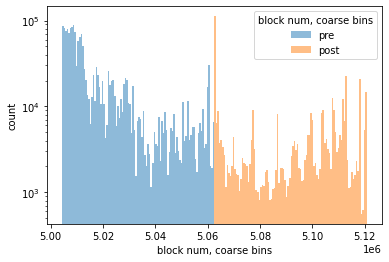

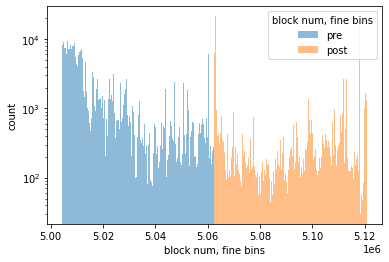

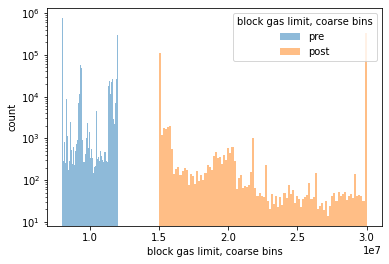

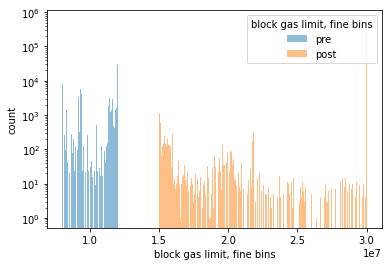

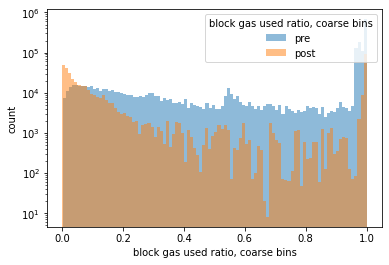

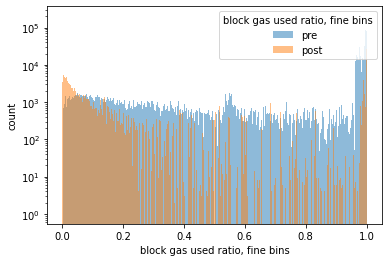

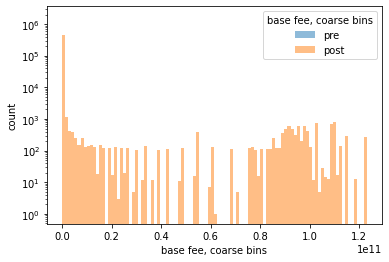

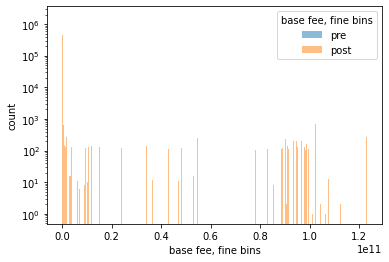

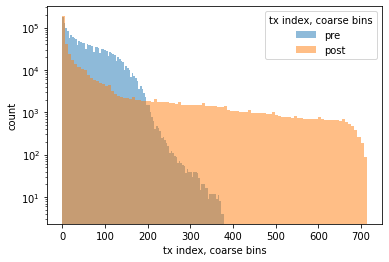

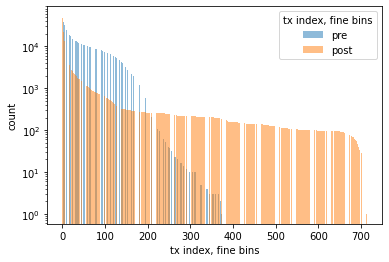

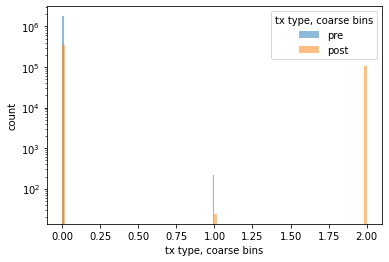

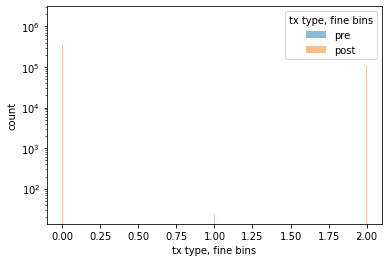

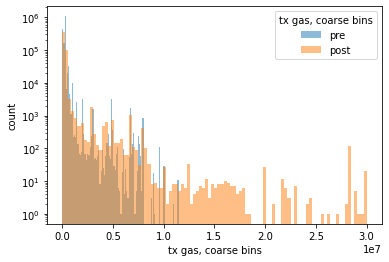

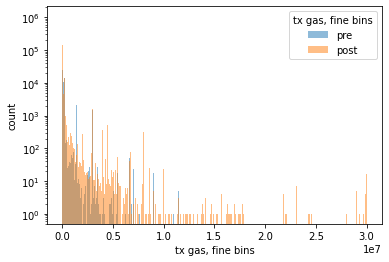

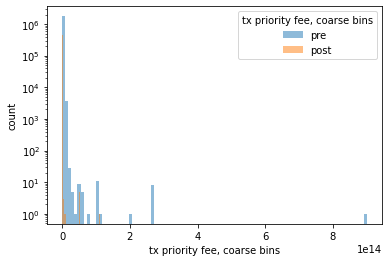

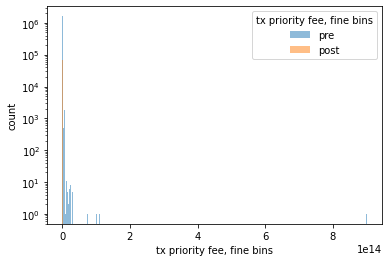

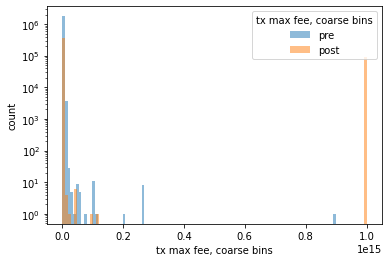

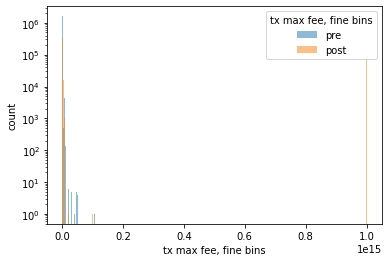

In [5]:
def compare(metric, bins, bin_type):
    label = f'{metric.replace("_"," ")}, {bin_type} bins'

    plt.hist(pre[metric], alpha=0.5, bins=bins, log=True, label='pre')
    plt.hist(post[metric], alpha=0.5, bins=bins, log=True,  label='post')
    plt.legend(loc='upper right', title=label)
    plt.xlabel(label)
    plt.ylabel("count")
    plt.show()

for metric in pre.columns:
    compare(metric, 100, 'coarse')
    compare(metric, 1000, 'fine')
    

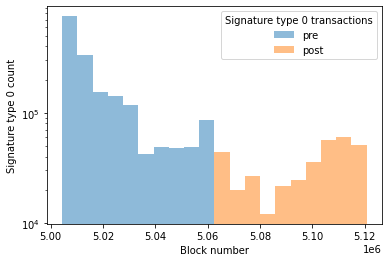

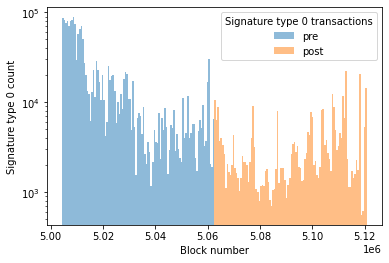

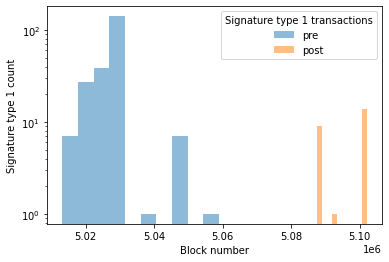

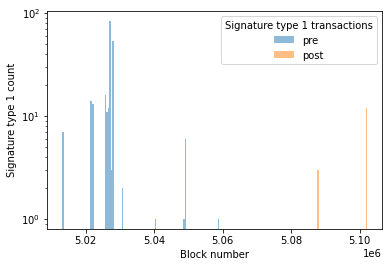

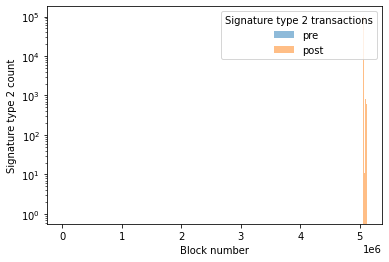

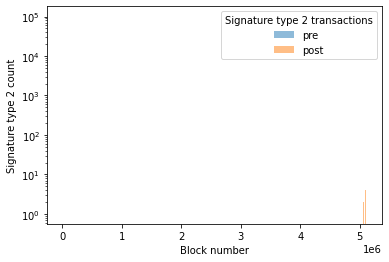

[None, None, None, None, None, None]

In [6]:
def type_distribution(tx_type, bins):
    # Transaction type 1 pre-fork.
    type_x_pre = pre[pre['tx_type'] == tx_type]
    # Transaction type 2 pre-fork.
    type_x_post = post[post['tx_type'] == tx_type]

    label = f"Signature type {tx_type} transactions"

    plt.hist(type_x_pre['block_num'], alpha=0.5, bins=bins, log=True, label='pre')
    plt.hist(type_x_post['block_num'], alpha=0.5, bins=bins, log=True,  label='post')
    plt.legend(loc='upper right', title=label)
    plt.xlabel('Block number')
    plt.ylabel(f'Signature type {tx_type} count')
    plt.show()

# Plot them by block, with low then high bin number.
[type_distribution(t, b) for t in range(3) for b in [10, 100]]


In [7]:
# Signature type II transactions
type_2 = post[post['tx_type'] == 2]
type_2.describe()


,block_num,block_gas_limit,block_gas_used_ratio,base_fee,tx_index,tx_type,tx_gas,tx_priority_fee,tx_max_fee
count,1.074360e+05,1.074360e+05,107436.000000,1.074360e+05,107436.000000,107436.0,1.074360e+05,1.074360e+05,1.074360e+05
mean,5.064930e+06,1.583810e+07,0.836118,8.085467e+09,263.180982,2.0,8.955051e+04,8.568540e+10,8.457078e+14
std,8.683603e+03,3.373548e+06,0.283955,2.629900e+10,205.167746,0.0,6.292157e+05,6.229032e+10,3.614072e+14
min,5.062611e+06,1.497072e+07,0.001000,7.000000e+00,0.000000,2.0,2.100000e+04,0.000000e+00,7.000000e+00
25%,5.062874e+06,1.498636e+07,0.770000,6.967806e+06,78.000000,2.0,2.100000e+04,3.300000e+10,1.000031e+15
50%,5.062957e+06,1.500000e+07,0.999000,1.246438e+07,228.000000,2.0,2.100000e+04,8.400000e+10,1.000112e+15
75%,5.063045e+06,1.500102e+07,0.999000,1.624676e+07,430.000000,2.0,2.100000e+04,1.290000e+11,1.000238e+15
max,5.115718e+06,3.000000e+07,1.000000,1.229764e+11,713.000000,2.0,2.900000e+07,6.000000e+11,1.000400e+15


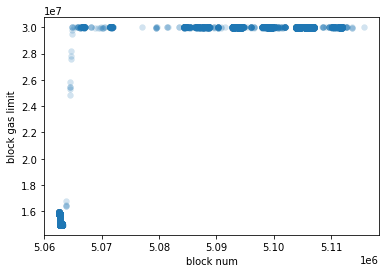

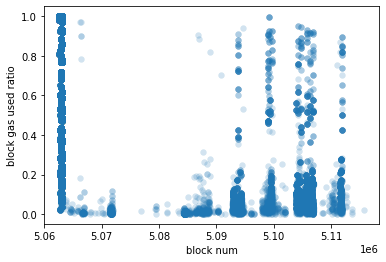

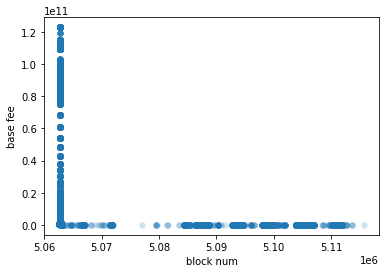

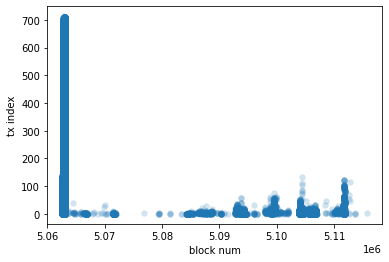

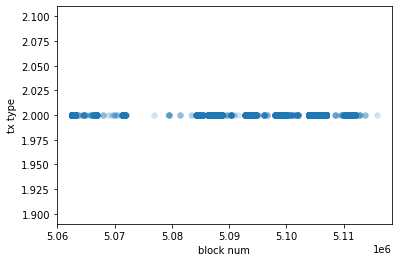

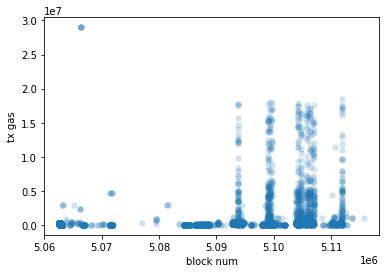

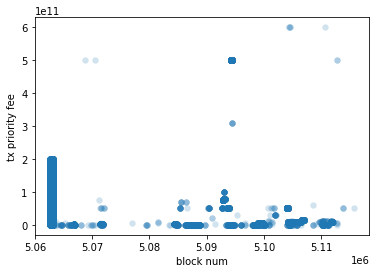

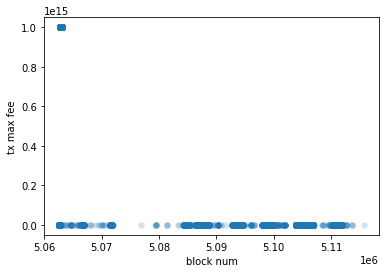

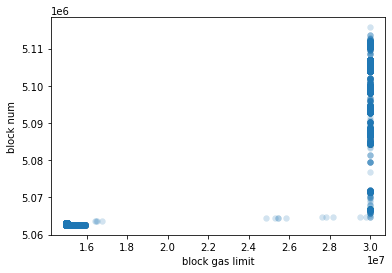

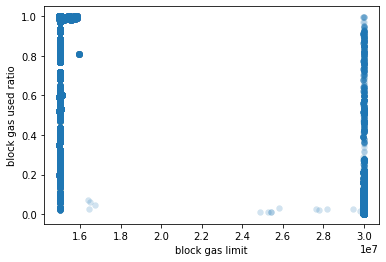

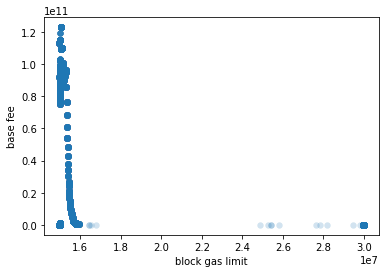

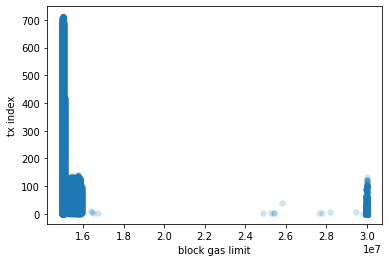

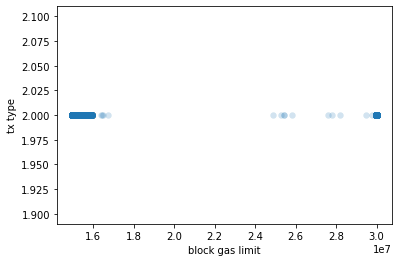

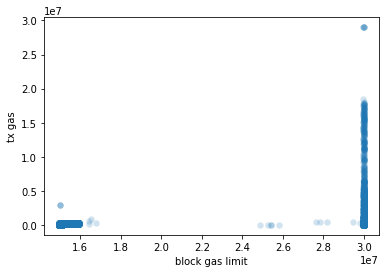

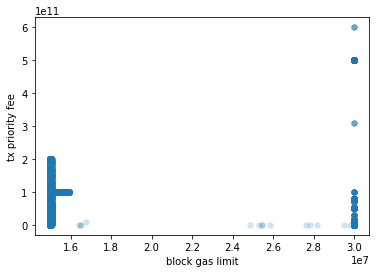

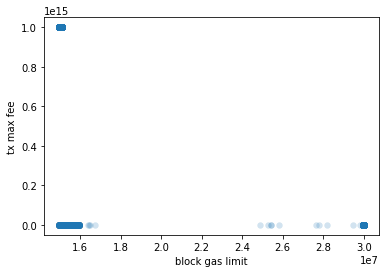

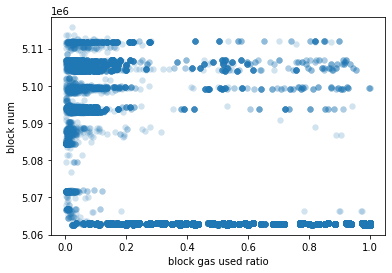

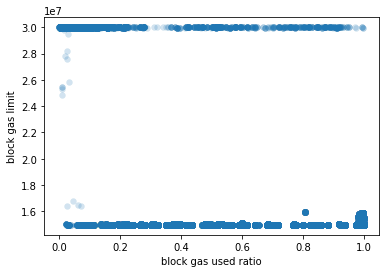

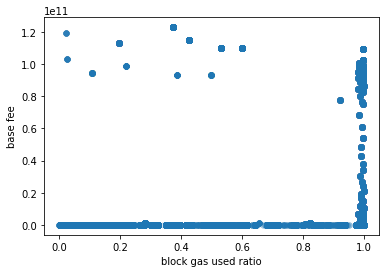

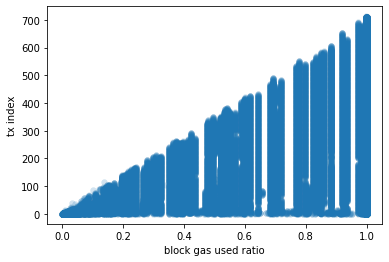

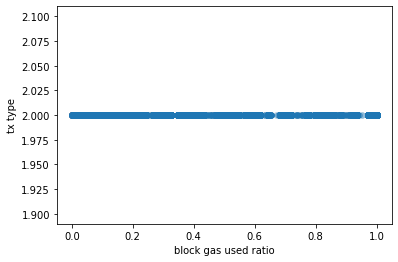

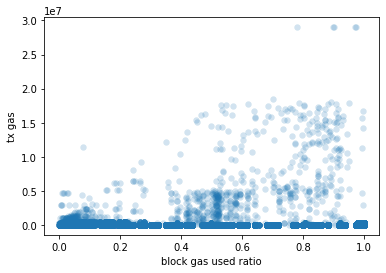

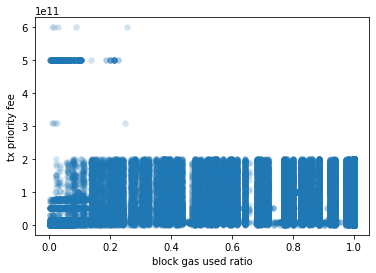

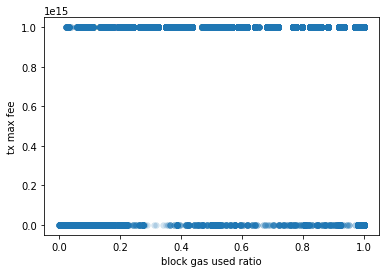

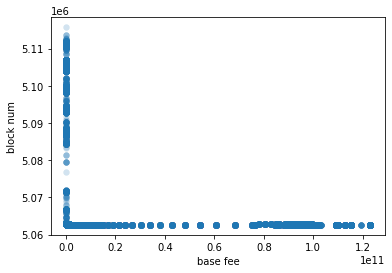

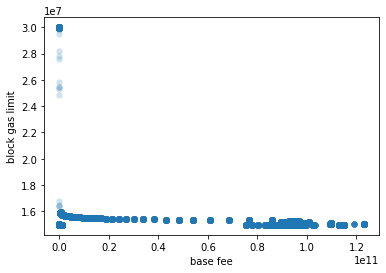

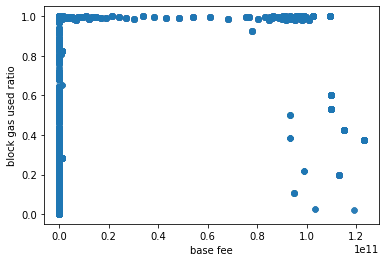

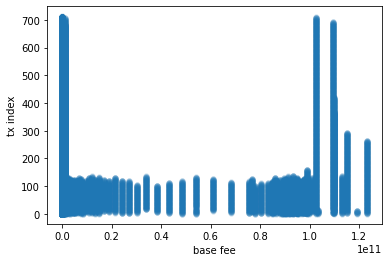

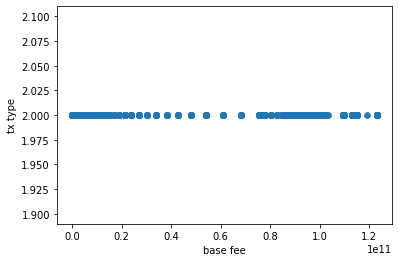

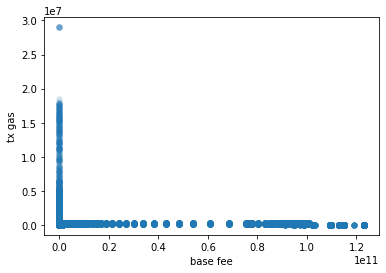

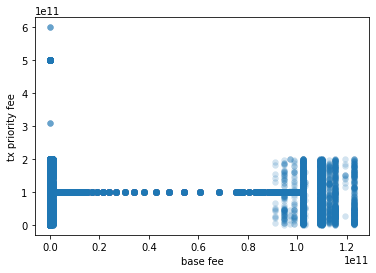

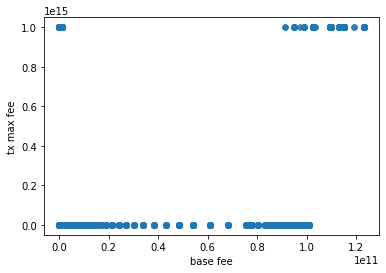

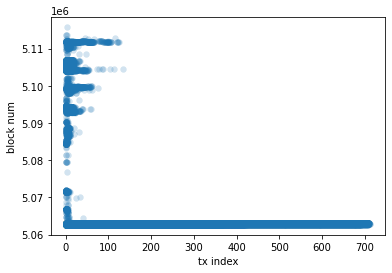

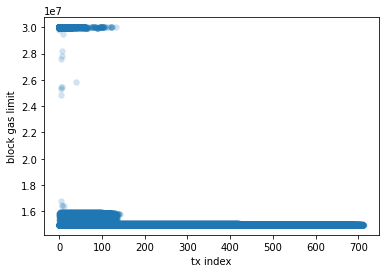

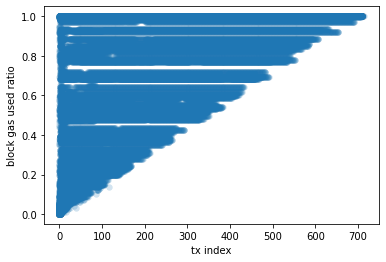

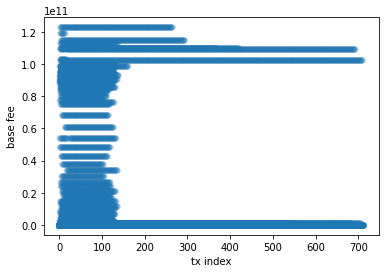

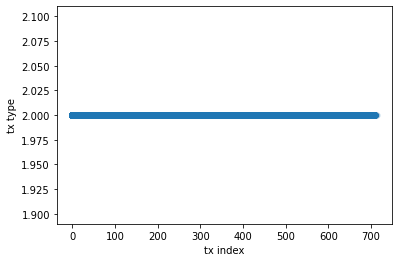

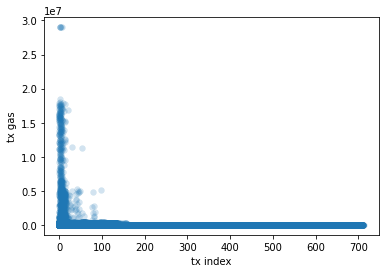

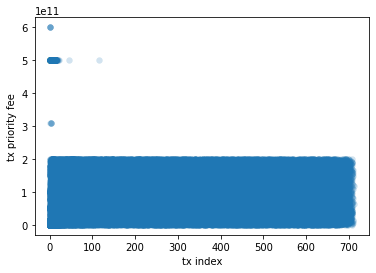

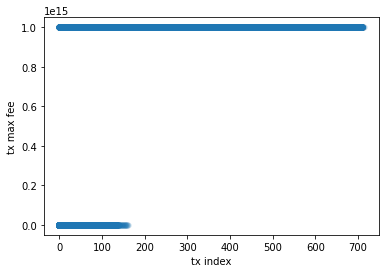

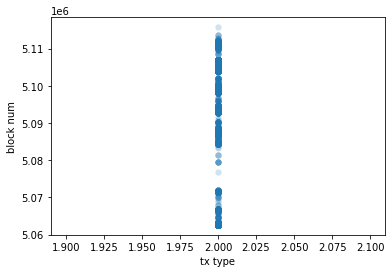

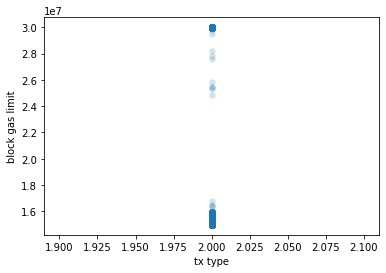

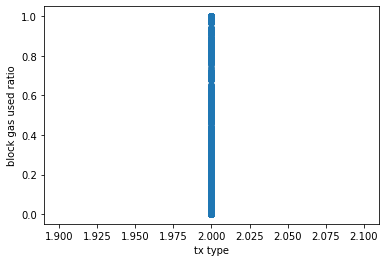

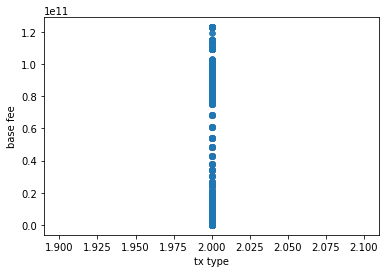

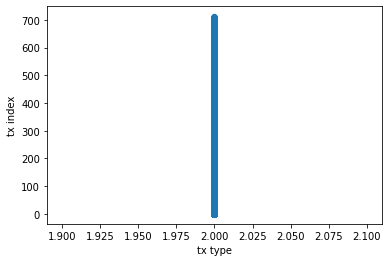

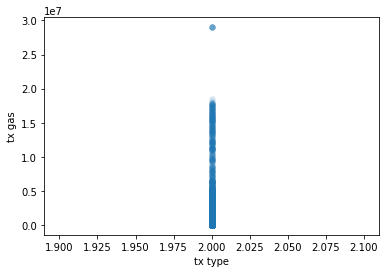

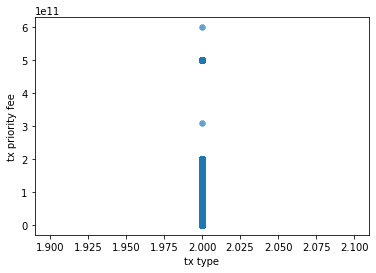

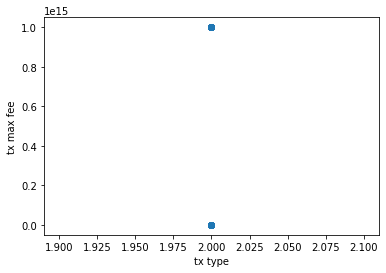

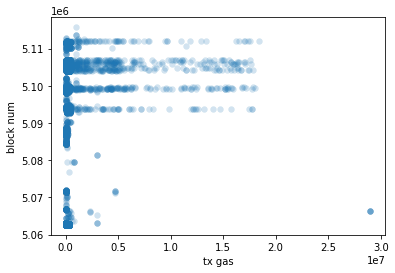

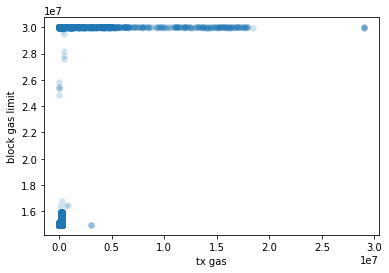

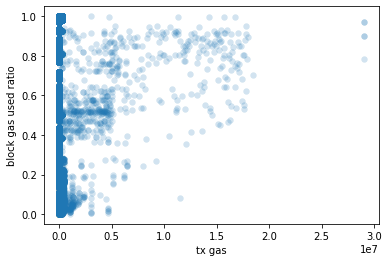

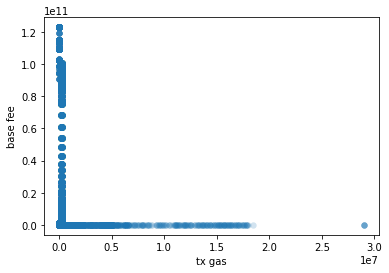

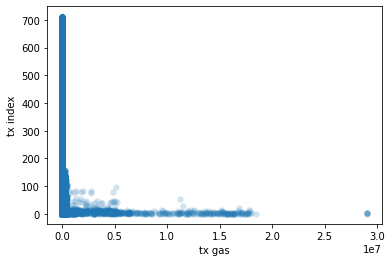

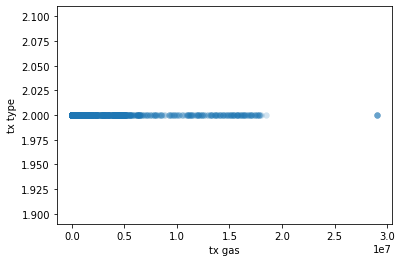

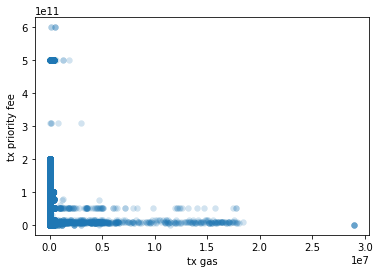

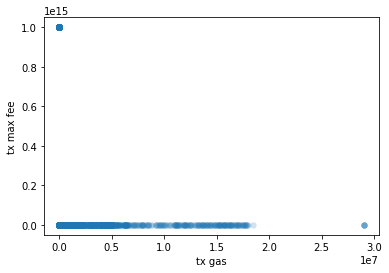

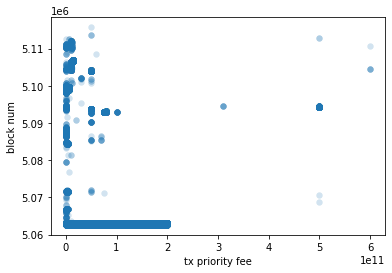

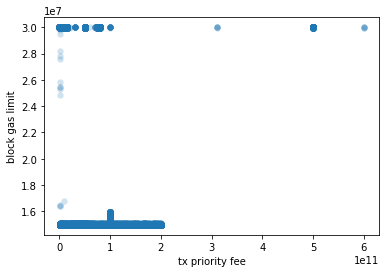

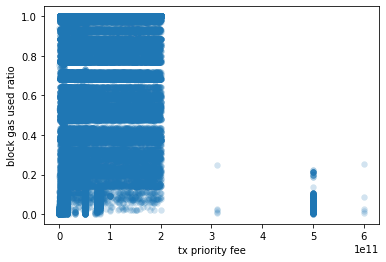

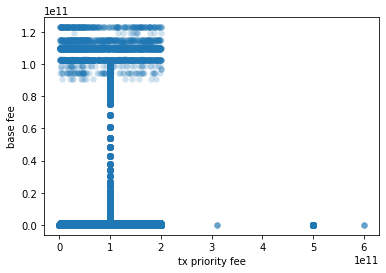

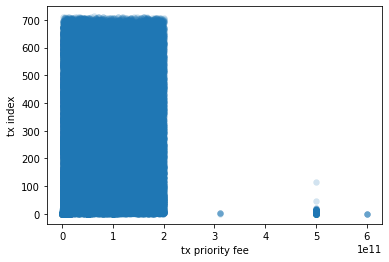

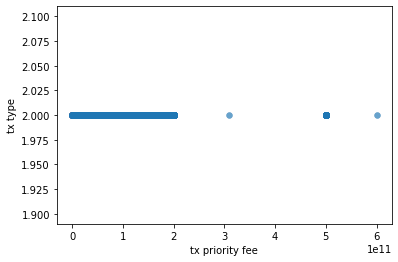

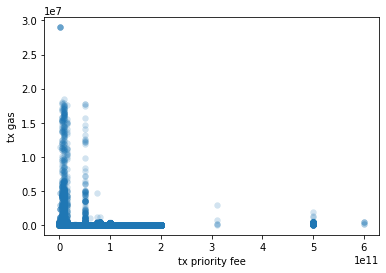

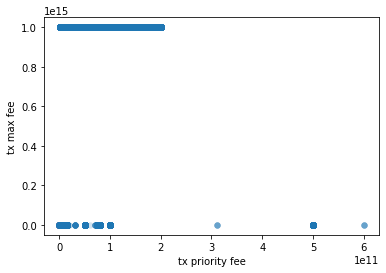

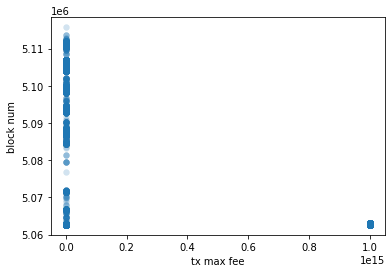

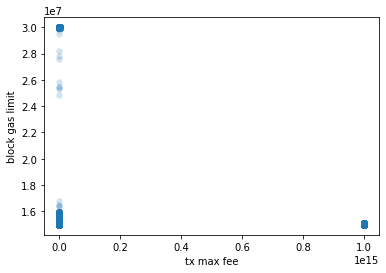

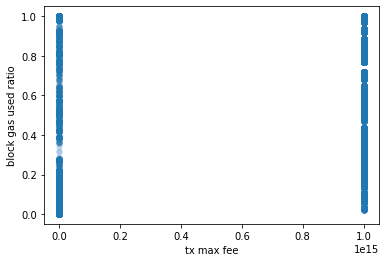

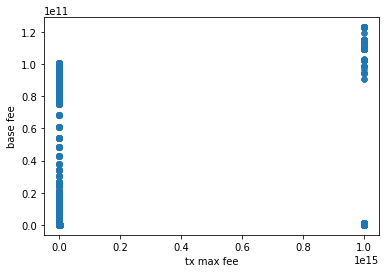

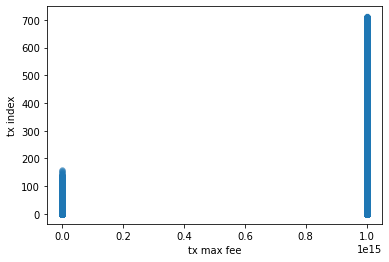

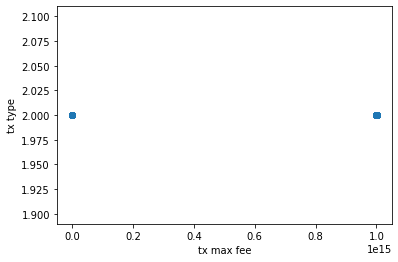

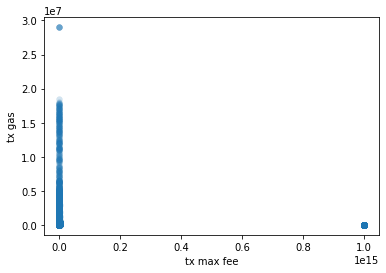

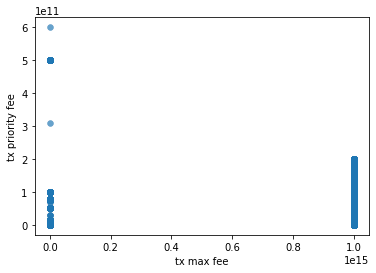

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
def get_scatter(m1, m2):
    fig, ax = plt.subplots()
    plt.scatter(type_2[m1], type_2[m2], alpha=0.2, linewidth=0.2)
    # ax.set_xscale('log')
    ax.set_xlabel(m1.replace("_", " "))
    ax.set_ylabel(m2.replace("_", " "))
    # ax.set_yscale('log')
    plt.show()

#get_scatter('block_gas_used_ratio','tx_priority_fee')
[get_scatter(m1,m2) for m1 in post.columns for m2 in post.columns if m1 != m2]
